In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate [0], coordinate [1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
import requests
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# We will need to do the following:

## 1- Import our dependencies and initialize counters and an empty list that will hold the weather data.
## 2- Loop through the cities list.
## 3- Group the cities in sets of 50 to log the process as we find the weather data for each city.
###  - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
## 4- Build the city_url or endpoint for each city.
## 5- Log the URL and the record and set numbers.
## 6- Make an API request for each city.
## 7- Parse the JSON weather data for the following:
###  - City, country, and date
###  - Latitude and longitude
###  - Maximum temperature
###  - Humidity
###  - Cloudiness
###  - Wind speed
## 8- Add the data to a list in a dictionary format and then convert the list to a DataFrame.



In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [9]:
# Create an empty list to hold the weather data
city_data =[]
# Print the beginning of the logging
print("Beginnig Data Retrieval       ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginnig Data Retrieval       
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | bud
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | bousso
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | vardo
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | oxford
Processing Record 15 of Set 1 | diamantino
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | aswan
Processing Record 18 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | nhulunbuy
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | mayo
Processing Record 23 of Set 1 | provideniya
Processing Record 24 of Set 1 | saskylakh

Processing Record 40 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 4 | abu samrah
Processing Record 42 of Set 4 | puerto cabello
Processing Record 43 of Set 4 | derzhavinsk
Processing Record 44 of Set 4 | kapaa
Processing Record 45 of Set 4 | moosomin
Processing Record 46 of Set 4 | port-cartier
Processing Record 47 of Set 4 | vyartsilya
Processing Record 48 of Set 4 | lavrentiya
Processing Record 49 of Set 4 | chuy
Processing Record 50 of Set 4 | saint-philippe
Processing Record 1 of Set 5 | yar-sale
Processing Record 2 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 3 of Set 5 | stephenville
Processing Record 4 of Set 5 | abu kamal
Processing Record 5 of Set 5 | ascoli piceno
Processing Record 6 of Set 5 | lima
Processing Record 7 of Set 5 | bago
Processing Record 8 of Set 5 | menomonie
Processing Record 9 of Set 5 | clarence town
Processing Record 10 of Set 5 | tutoia
Processing Record 11 of Set 5 | stolbishche
Processing Record 12 

Processing Record 29 of Set 8 | kirakira
Processing Record 30 of Set 8 | ishigaki
Processing Record 31 of Set 8 | bembereke
Processing Record 32 of Set 8 | kerchevskiy
Processing Record 33 of Set 8 | phuket
Processing Record 34 of Set 8 | bela
Processing Record 35 of Set 8 | ous
Processing Record 36 of Set 8 | port hardy
Processing Record 37 of Set 8 | elmira
Processing Record 38 of Set 8 | pathein
Processing Record 39 of Set 8 | valverde del camino
Processing Record 40 of Set 8 | grua
Processing Record 41 of Set 8 | buala
Processing Record 42 of Set 8 | leningradskiy
Processing Record 43 of Set 8 | cuamba
Processing Record 44 of Set 8 | hohhot
Processing Record 45 of Set 8 | anupgarh
Processing Record 46 of Set 8 | samusu
City not found. Skipping...
Processing Record 47 of Set 8 | ust-nera
Processing Record 48 of Set 8 | srednekolymsk
Processing Record 49 of Set 8 | upernavik
Processing Record 50 of Set 8 | fairbanks
Processing Record 1 of Set 9 | constitucion
Processing Record 2 of S

Processing Record 15 of Set 12 | lerwick
Processing Record 16 of Set 12 | oranjemund
Processing Record 17 of Set 12 | menongue
Processing Record 18 of Set 12 | maldonado
Processing Record 19 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 20 of Set 12 | navirai
Processing Record 21 of Set 12 | noumea
Processing Record 22 of Set 12 | umm kaddadah
Processing Record 23 of Set 12 | phangnga
Processing Record 24 of Set 12 | komsomolskiy
Processing Record 25 of Set 12 | inuvik
Processing Record 26 of Set 12 | rameswaram
Processing Record 27 of Set 12 | herat
Processing Record 28 of Set 12 | pachino
Processing Record 29 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 30 of Set 12 | suez
Processing Record 31 of Set 12 | westpunt
City not found. Skipping...
Processing Record 32 of Set 12 | vieux fort
Processing Record 33 of Set 12 | tocopilla
Processing Record 34 of Set 12 | bara
Processing Record 35 of Set 12 | nouadhibou
Processing Record 36 of Set 12

In [11]:
len (city_data)

556

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,56.48,96,99,7.70,NZ,2022-01-19 05:57:42
1,Bud,39.4470,-86.1758,44.69,74,99,16.08,US,2022-01-19 05:57:42
2,Bluff,-46.6000,168.3333,56.80,61,71,22.03,NZ,2022-01-19 05:57:43
3,Jamestown,42.0970,-79.2353,28.71,60,100,5.99,US,2022-01-19 05:54:53
4,Bousso,10.4795,16.7117,59.81,24,31,9.04,TD,2022-01-19 05:57:43
5,Cape Town,-33.9258,18.4232,66.11,69,0,1.99,ZA,2022-01-19 05:57:44
6,Port Alfred,-33.5906,26.8910,69.30,69,52,13.42,ZA,2022-01-19 05:57:44
7,East London,-33.0153,27.9116,70.74,73,0,13.80,ZA,2022-01-19 05:57:45
8,Ilulissat,69.2167,-51.1000,20.32,81,100,7.92,GL,2022-01-19 05:57:45
9,Avarua,-21.2078,-159.7750,77.05,94,75,23.02,CK,2022-01-19 05:55:16


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-01-19 05:57:42,-46.1927,168.8643,56.48,96,99,7.70
1,Bud,US,2022-01-19 05:57:42,39.4470,-86.1758,44.69,74,99,16.08
2,Bluff,NZ,2022-01-19 05:57:43,-46.6000,168.3333,56.80,61,71,22.03
3,Jamestown,US,2022-01-19 05:54:53,42.0970,-79.2353,28.71,60,100,5.99
4,Bousso,TD,2022-01-19 05:57:43,10.4795,16.7117,59.81,24,31,9.04
5,Cape Town,ZA,2022-01-19 05:57:44,-33.9258,18.4232,66.11,69,0,1.99
6,Port Alfred,ZA,2022-01-19 05:57:44,-33.5906,26.8910,69.30,69,52,13.42
7,East London,ZA,2022-01-19 05:57:45,-33.0153,27.9116,70.74,73,0,13.80
8,Ilulissat,GL,2022-01-19 05:57:45,69.2167,-51.1000,20.32,81,100,7.92
9,Avarua,CK,2022-01-19 05:55:16,-21.2078,-159.7750,77.05,94,75,23.02


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

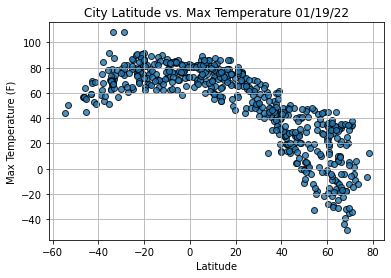

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

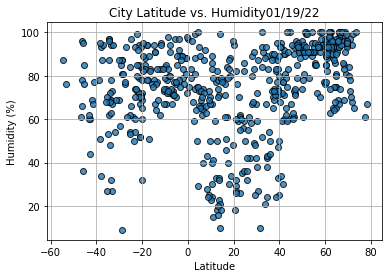

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

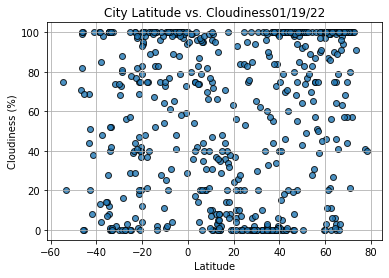

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

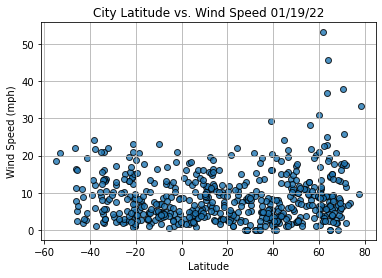

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [46]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

In [47]:
index13 = city_data_df.loc[13]
index13

City                       Oxford
Country                        GB
Date          2022-01-19 05:57:47
Lat                       51.7522
Lng                        -1.256
Max Temp                    41.22
Humidity                       99
Cloudiness                     49
Wind Speed                   8.03
Name: 13, dtype: object

In [48]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

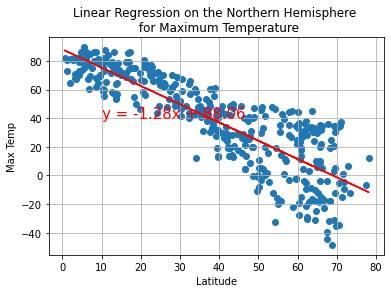

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp",(10,40))

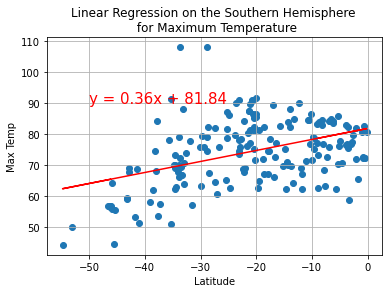

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

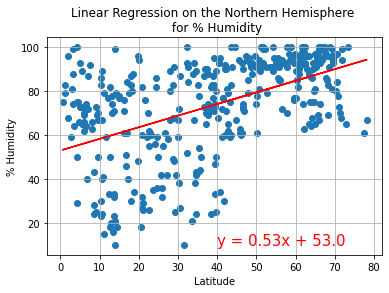

In [51]:
# Linear regression on humidity and Northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"] 

plot_linear_regression(x_values, y_values, 
            "Linear Regression on the Northern Hemisphere \n for % Humidity", '% Humidity',(40,10))

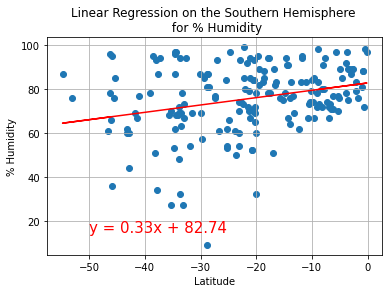

In [52]:
# Linear regression on humidity and the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

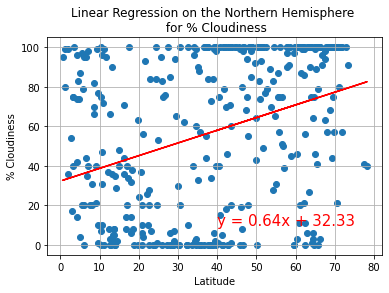

In [53]:
# Linear regression on cloudiness and Northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"] 

plot_linear_regression(x_values, y_values, 
            "Linear Regression on the Northern Hemisphere \n for % Cloudiness", '% Cloudiness',(40,10))

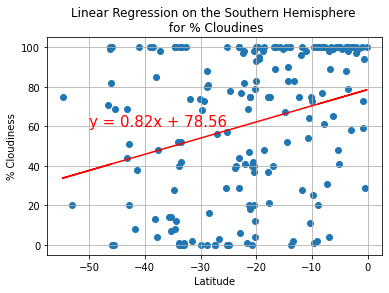

In [54]:
# Linear regression on cloudiness and the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudines', '% Cloudiness',(-50,60))

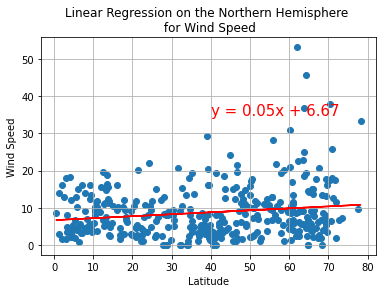

In [55]:
# Linear regression on wind speed and the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

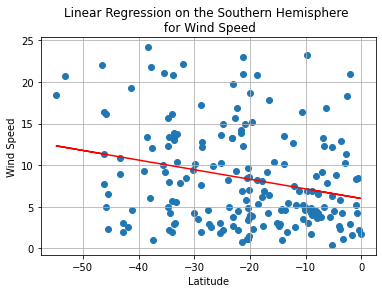

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))